**Introduction**

The dataset used in this exercise session is a subset of the publicly available TLC Dataset (all rights reserved by Taxi & Limousine Commission (TLC), City of New York). The prediction of the tip amount can be modeled as a regression problem. To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [15]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data = raw_data.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
raw_data


,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,mta_tax,tolls_amount,tip_amount
0,1,17.63,2,132,164,70.0,0.5,6.94,16.54
1,1,19.52,2,132,236,70.0,0.5,6.94,16.19
2,1,17.81,2,132,48,70.0,0.5,6.94,12.00
3,2,19.30,2,132,148,70.0,0.5,0.00,5.00
4,1,18.75,2,132,234,70.0,0.5,6.94,10.00
...,...,...,...,...,...,...,...,...,...
41197,1,16.94,2,132,164,70.0,0.5,6.94,5.00
41198,4,19.83,2,132,166,70.0,0.5,6.94,8.00
41199,1,17.31,2,132,137,70.0,0.5,6.94,8.00
41200,1,17.28,2,132,233,70.0,0.5,6.94,16.19


Each row in the dataset represents a taxi trip. As shown above, each row has 13 variables. One of the variables is tip_amount which will be the target variable. Your objective will be to train a model that uses the other variables to predict the value of the tip_amount variable.

To understand the dataset a little better, let us plot the correlation of the target variable against the input variables.

<Axes: >

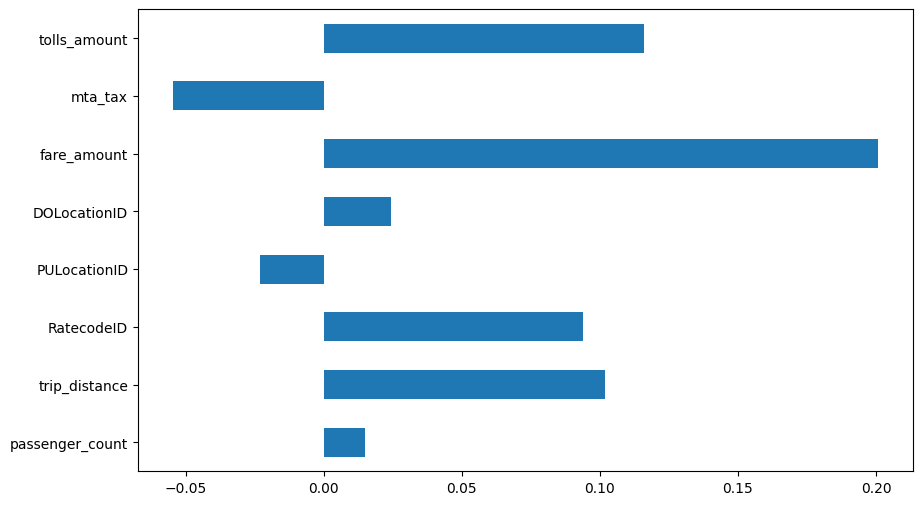

In [16]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

This shows us that the input features payment_type, VendorID, store_and_fwd_flag and improvement_surcharge have little to no correlation with the target variable.


**Dataset Preprocessing**

You will now prepare the data for training by applying normalization to the input features.

In [17]:
# extract the labels from the dataframe
y = raw_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = raw_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

**Dataset Train/Test Split**

Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Build a Decision Tree Regressor model with Scikit-Learn**

Regression Trees are implemented using DecisionTreeRegressor.

The important parameters of the model are:

criterion: The function used to measure error, we use 'squared_error'.

max_depth - The maximum depth the tree is allowed to take; we use 8.

In [24]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=4,
                               random_state=35)

Now lets train our model using the `fit` method on the `DecisionTreeRegressor` object providing our training data


In [25]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=35)

<div id="dt_sklearn_snapml">
    <h2>Evaluate the Scikit-Learn and Snap ML Decision Tree Regressor Models</h2>
</div>


To evaluate our dataset we will use the `score` method of the `DecisionTreeRegressor` object providing our testing data, this number is the $R^2$ value which indicates the coefficient of determination. We will also evaluate the Mean Squared Error $(MSE)$ of the regression output with respect to the test set target values. High $R^2$ and low $MSE$ values are expected from a good regression model.


In [26]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

# MSE score : 24.555
# R^2 score : 0.028 with depth=8

MSE score : 24.468
R^2 score : 0.031


In [23]:
# top three features
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending=False)[:3]

,tip_amount
fare_amount,0.200638
tolls_amount,0.116172
trip_distance,0.101819
